In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [329]:
df=pd.read_csv('heart_disease_data.csv')

### EDA

In [331]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [332]:
df.shape

(303, 14)

In [333]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [334]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [336]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [337]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Observation:
No null/ missing values. Therefore, no imputation required

In [339]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Observation:
Classses in the dataset are relatively balanced but can be balanced further

In [341]:
# Correlation analysis

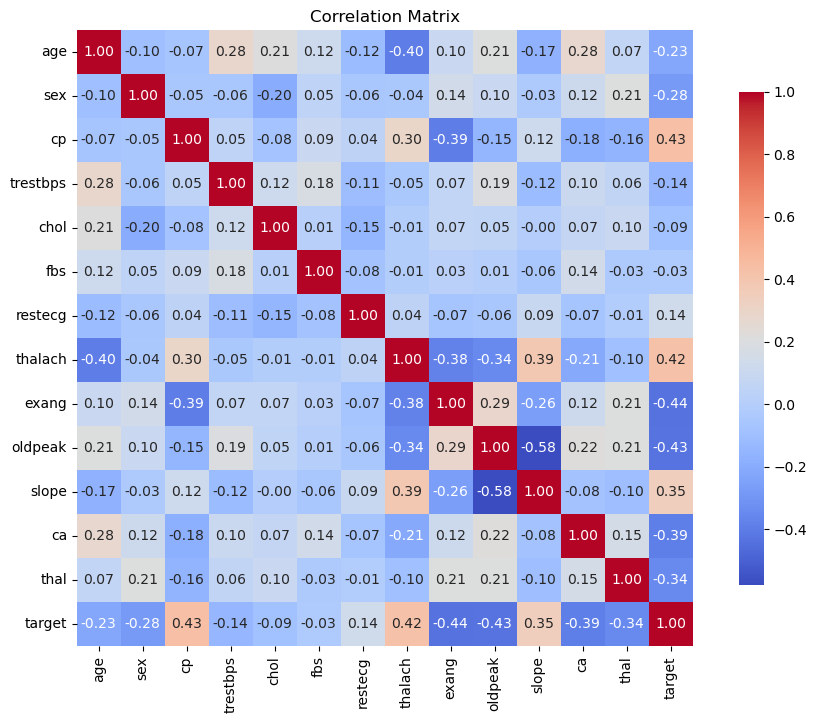

In [342]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [343]:
# Feature Distribution Analysis

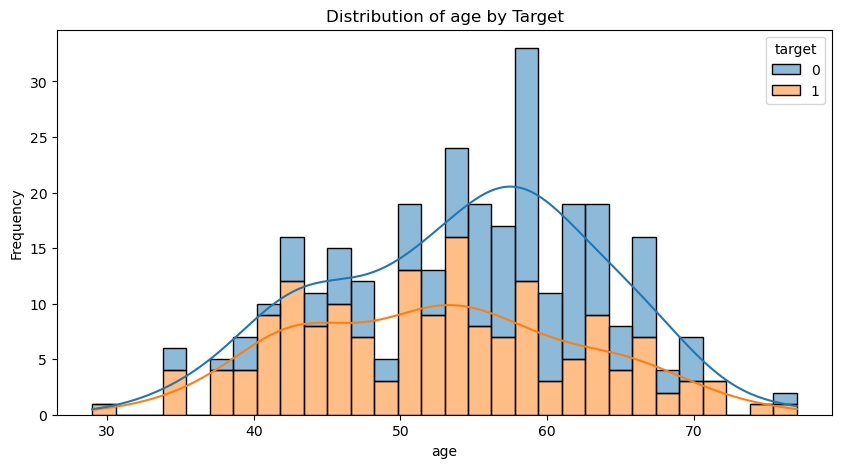

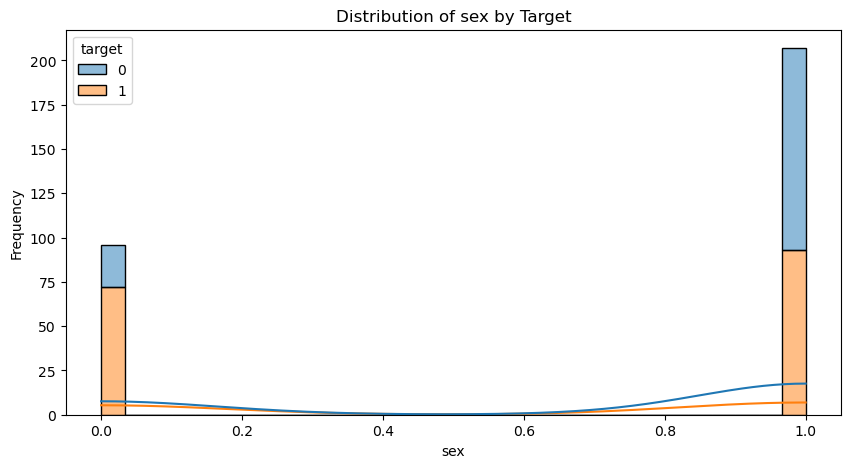

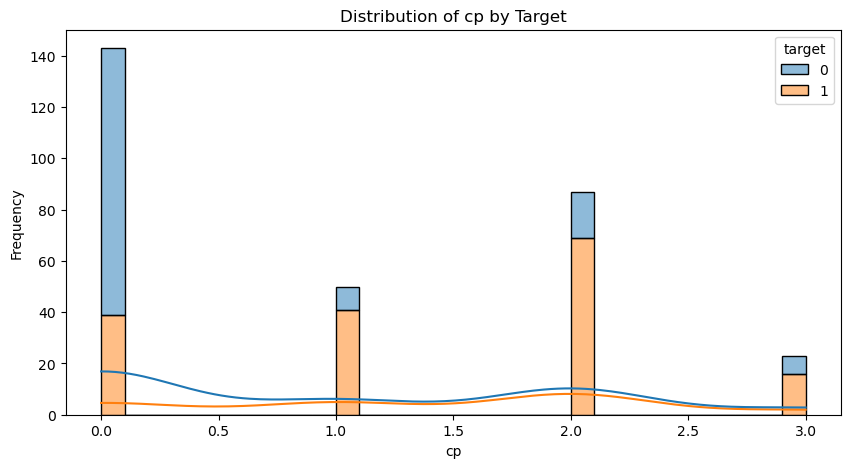

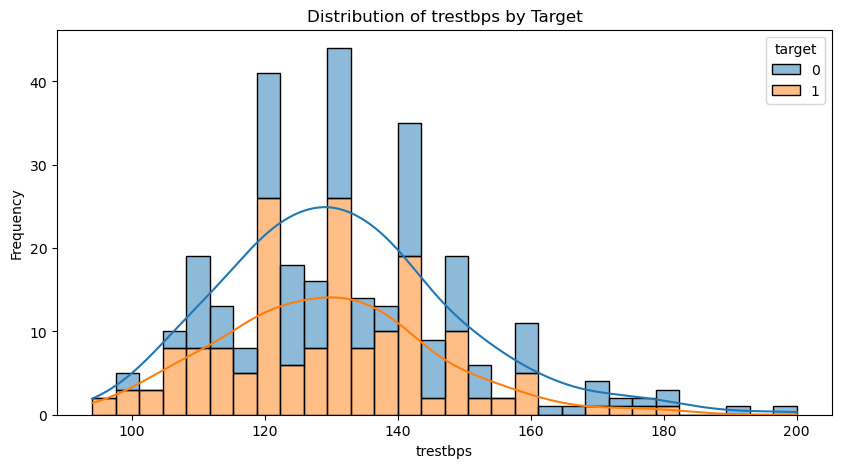

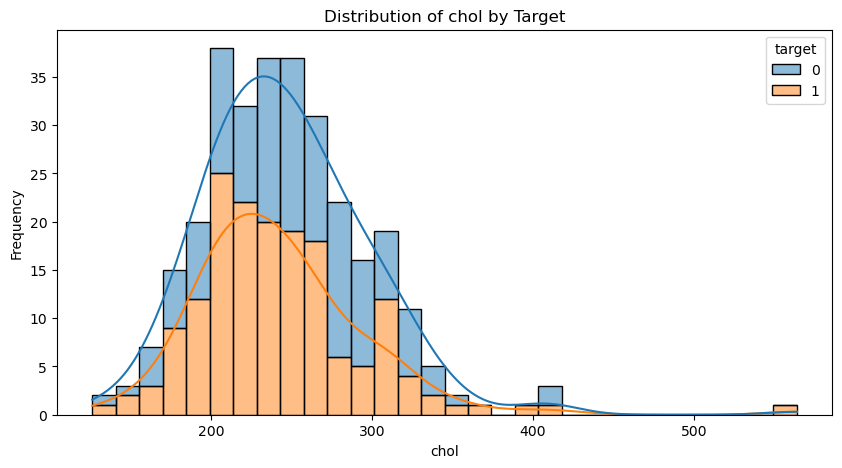

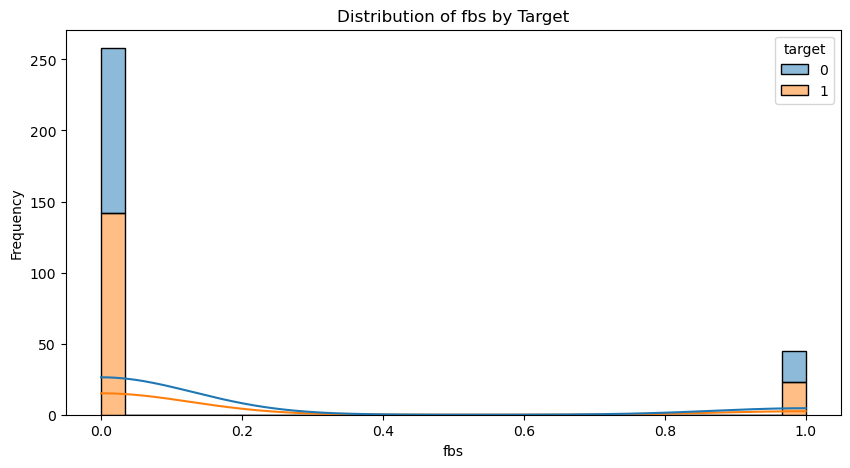

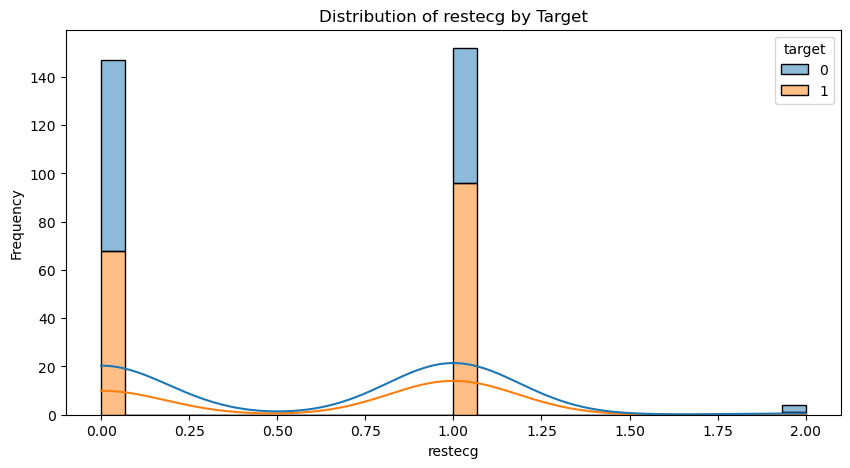

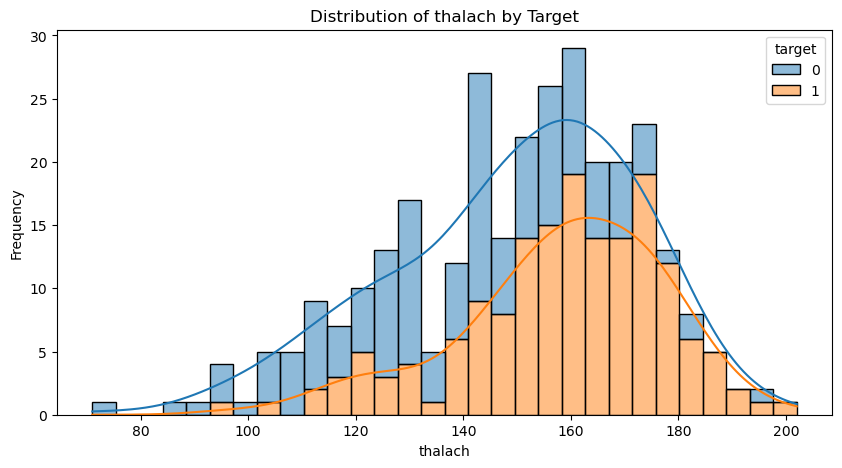

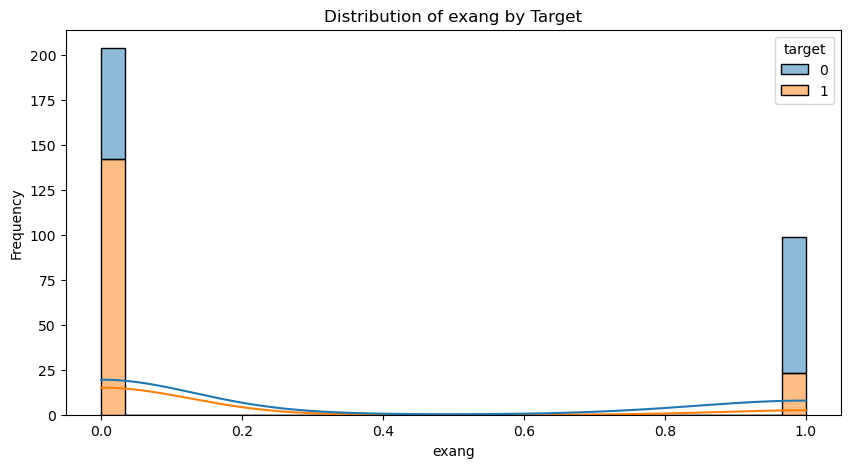

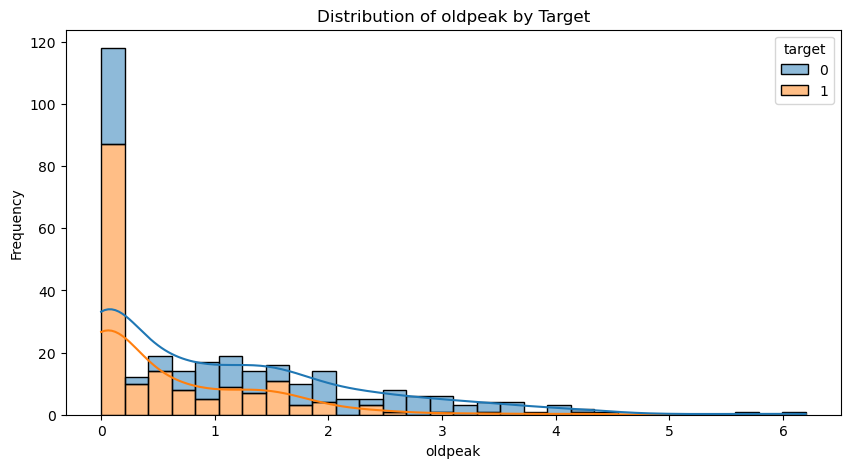

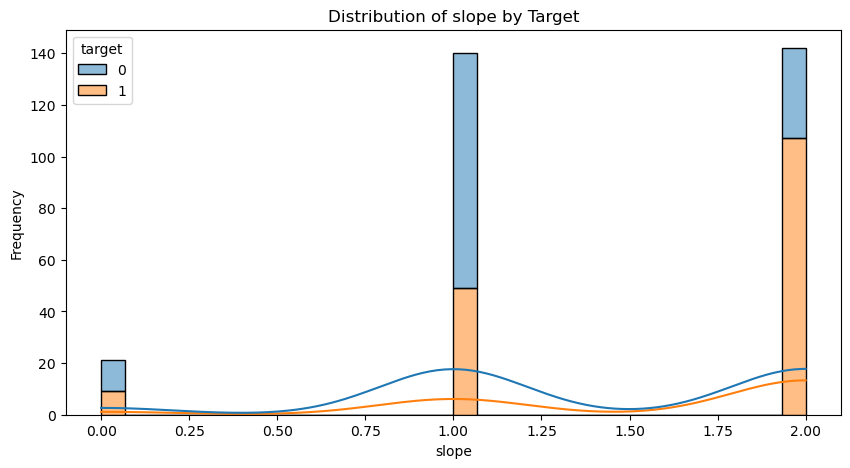

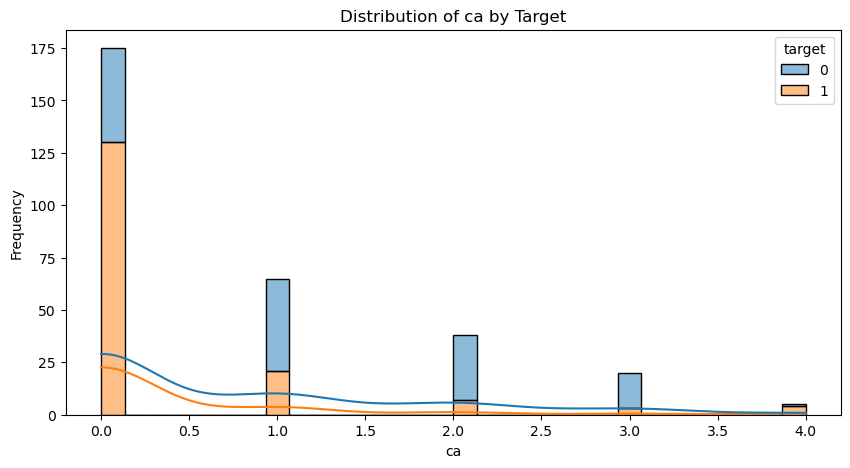

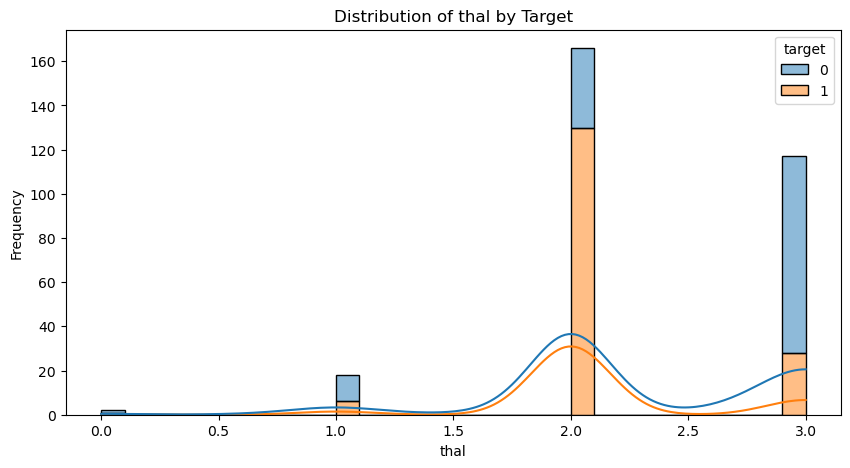

In [344]:
features = df.columns[:-1] 
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df, x=feature, hue='target', multiple='stack', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [345]:
# Boxplots for Outlier Detection

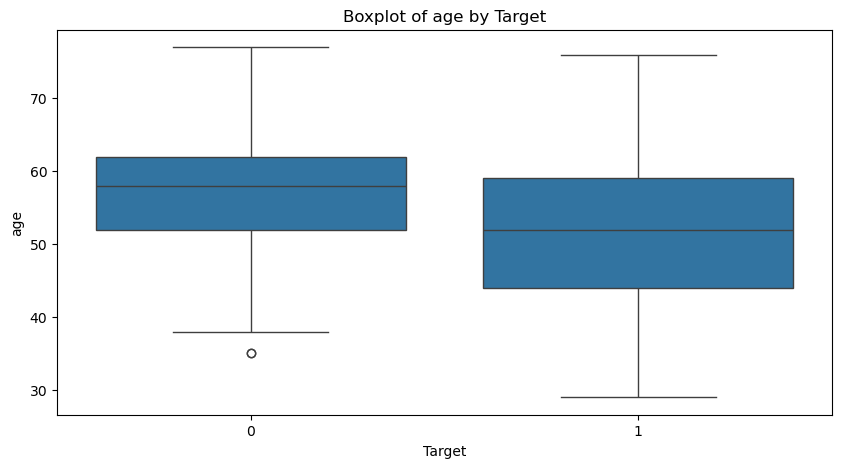

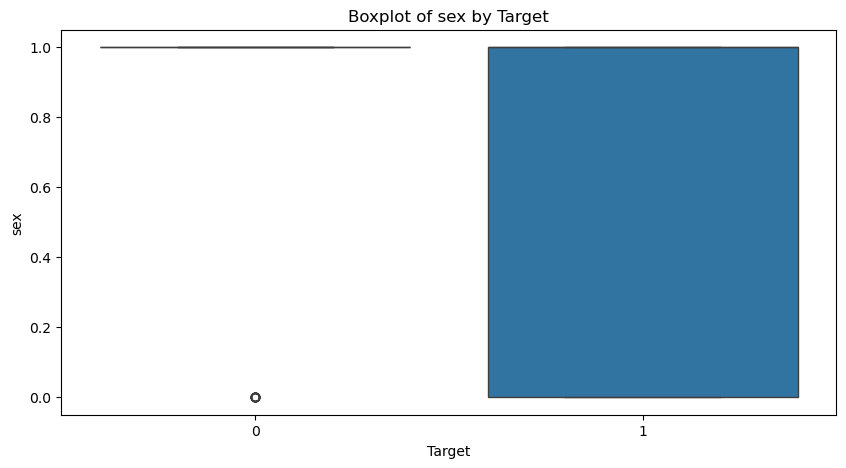

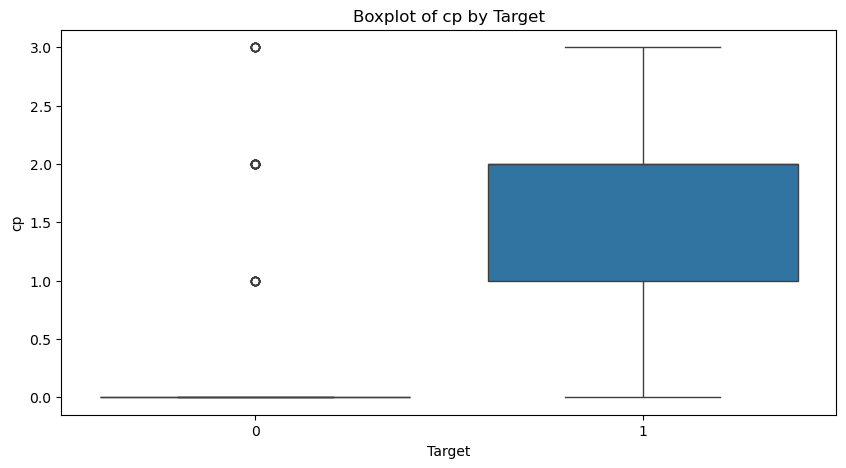

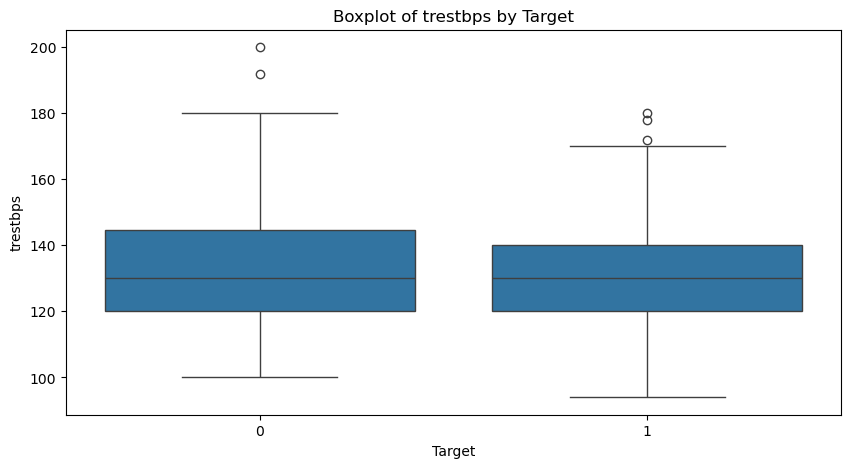

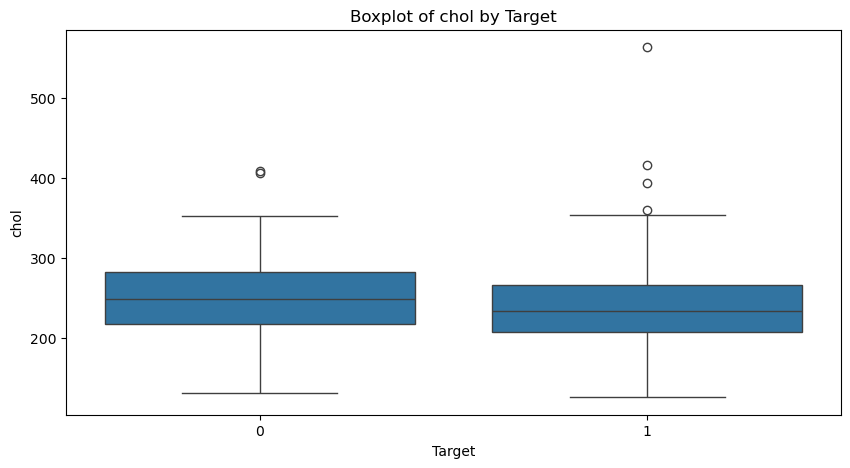

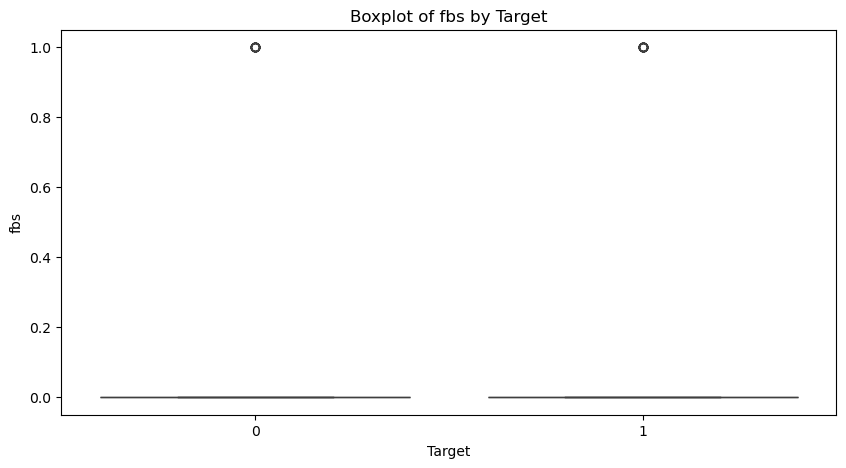

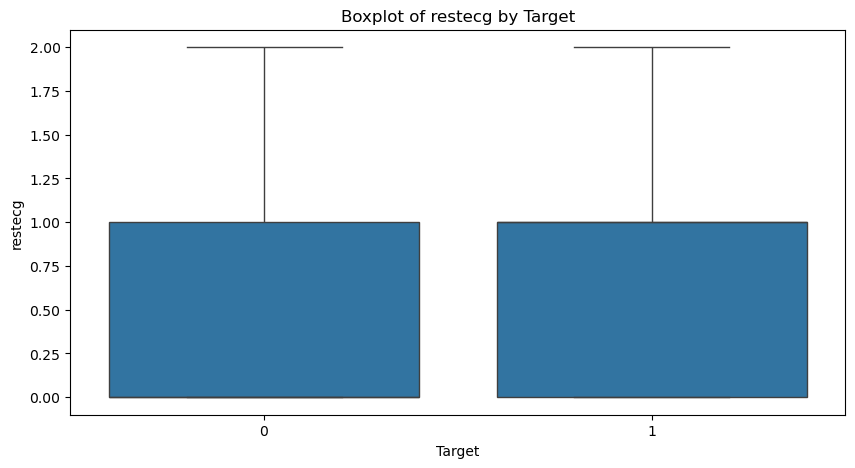

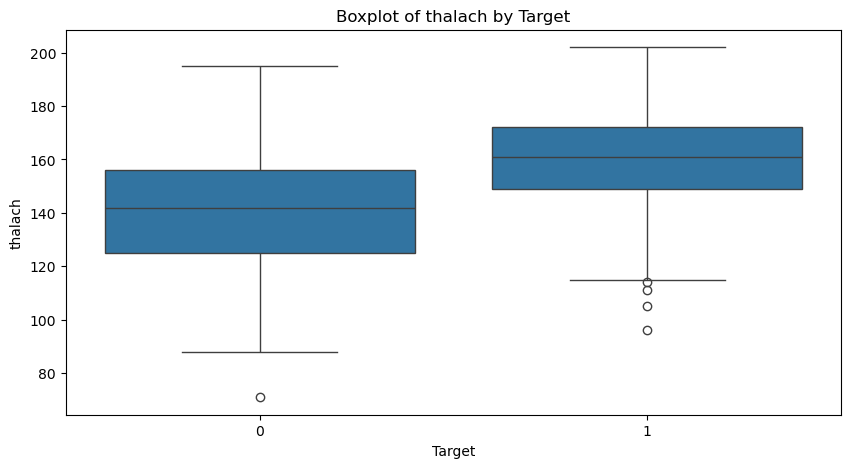

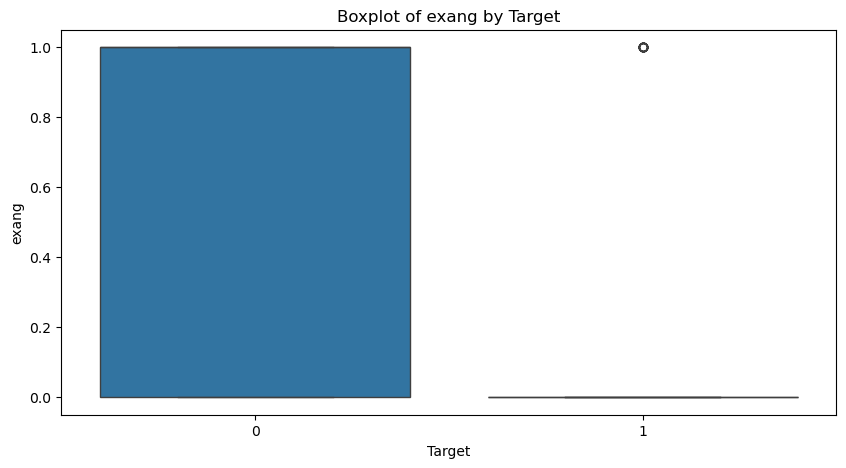

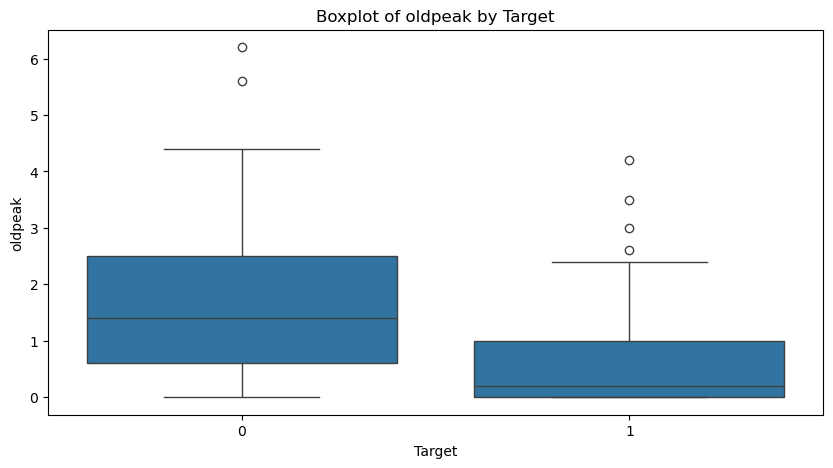

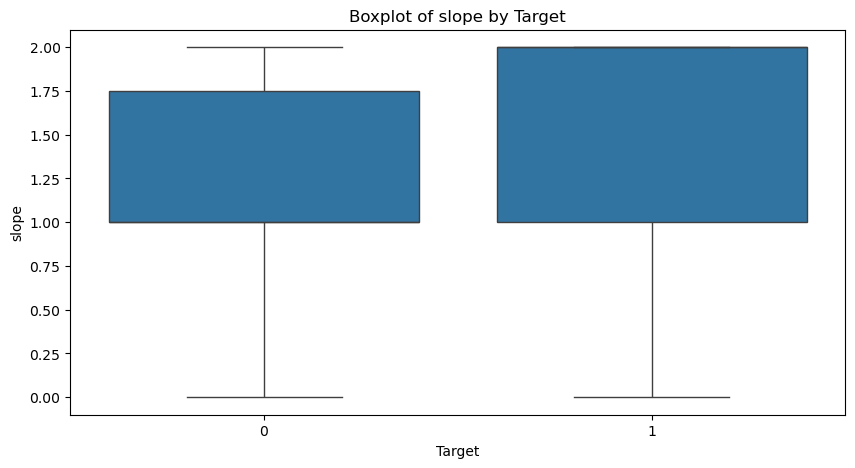

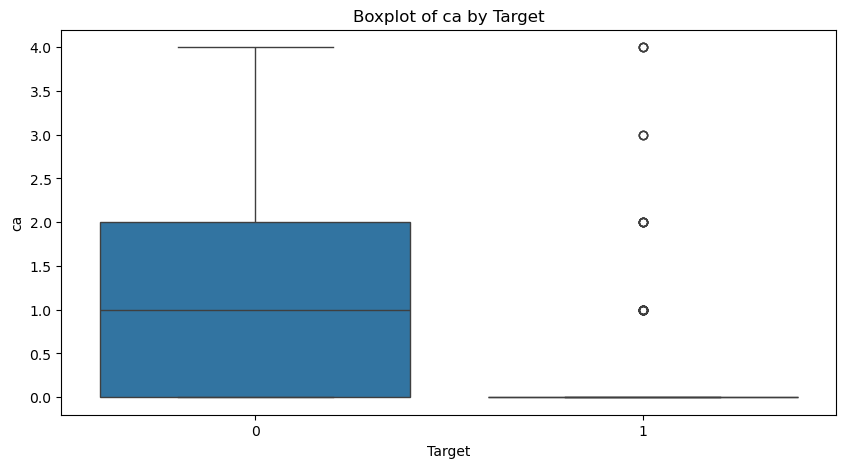

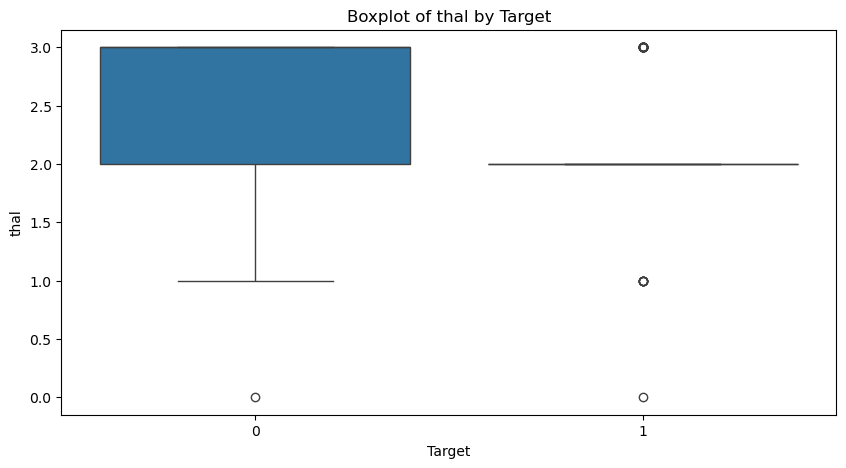

In [346]:
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.show()


### Logistic Regression

In [348]:
model=LogisticRegression()

In [349]:
X= df.drop(columns='target',axis=1)
Y=df['target']

In [350]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [351]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [352]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=6)

In [353]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [354]:
print(Y.shape, Y_train.shape, Y_test.shape)

(303,) (242,) (61,)


In [355]:
model.fit(X_train, Y_train)

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [356]:
#acccuracy calculation
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [357]:
print('accuracy on training data: ', training_data_accuracy)

accuracy on training data:  0.859504132231405


In [358]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [359]:
print('Accuracy on testing data:', testing_data_accuracy)

Accuracy on testing data: 0.8524590163934426


In [360]:
#predictive system
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [361]:
prediction =model.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [362]:
if prediction[0]==0:
    print('The personn does not have Heart Disease')
else:
    print('The person have heart disease')

The person have heart disease


### Applying SMOTE

In [364]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42) 
X_smote, Y_smote = smote.fit_resample(X, Y)

print("Original dataset shape:", X.shape)
print("Augmented dataset shape:", X_smote.shape)
print("Original target shape:", Y.shape)
print("Augmented target shape:", Y_smote.shape)


Original dataset shape: (303, 13)
Augmented dataset shape: (330, 13)
Original target shape: (303,)
Augmented target shape: (330,)


In [365]:
X_smote_train,X_smote_test,Y_smote_train,Y_smote_test= train_test_split(X_smote,Y_smote,test_size=0.2,stratify=Y_smote,random_state=6)

### Support Vector Machine

In [367]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [368]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smote_train)
X_test_scaled = scaler.transform(X_smote_test)

In [369]:
svm_model = SVC(kernel='rbf', random_state=4) 
svm_model.fit(X_train_scaled, Y_smote_train)

SVC(random_state=4)

In [370]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(Y_smote_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_smote_test, y_pred))
print("Classification Report:\n", classification_report(Y_smote_test, y_pred))

Accuracy: 0.8636363636363636
Confusion Matrix:
 [[28  5]
 [ 4 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.85      0.88      0.87        33

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66



### Random Forest

In [372]:
from sklearn.ensemble import RandomForestClassifier
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_smote_train, Y_smote_train)

RandomForestClassifier(random_state=42)

In [373]:
rf_prediction = model.predict(X_smote_test)
rf_accuracy=accuracy_score(X_smote_test_prediction,Y_smote_test)

In [374]:
print(rf_accuracy)

0.8939393939393939


### OBSERVATION:
Random forest outperforms Logistic regression and SVM with the use of SMOTE

In [376]:
print("Classification Report:\n", classification_report(Y_smote_test,rf_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.88      0.91      0.90        33

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.89      0.89      0.89        66



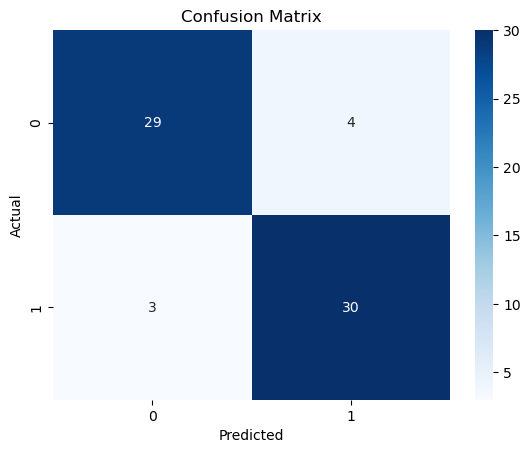

In [377]:
conf_matrix = confusion_matrix(Y_smote_test, rf_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC-AUC Score: 0.9494949494949495


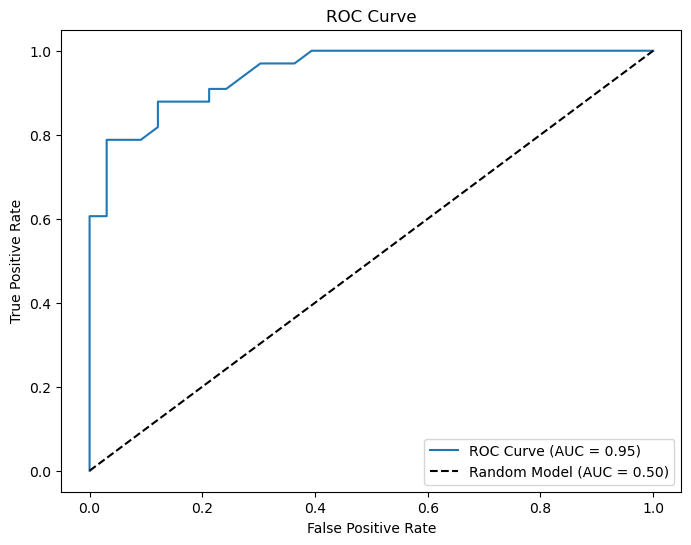

In [378]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(Y_smote_test, rf_model_smote.predict_proba(X_smote_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(Y_smote_test, rf_model_smote.predict_proba(X_smote_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [379]:
#predictive system
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [380]:
prediction =rf_model_smote.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [381]:
if prediction[0]==0:
    print('The personn does not have Heart Disease')
else:
    print('The person have heart disease')

The person have heart disease
